Min Je (John) Kim
FA25 EE 102
Pre-requisite #3: Circuit Theory
9/07/2025

In [ ]:
# This Code Block will houise all of the Nessessary Imports and Hand made Functions I will use in this assignment
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

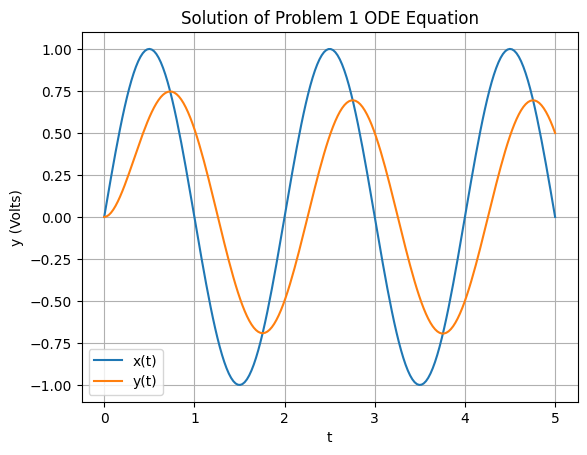

In [55]:
# Problem 2 Part A
def circuit(y, t, A, w, R, C): # Define the Function you are trying to Plot (rgs to Inport Parameters in the .odeint Function)
    x = A * np.sin(w*t)
    dydt = (x - y)/(R*C)
    return dydt


# Parameters
R = 330             # 330 Ohms
C = 0.001           # 1000 uF = 1 mF
T = 5              # Arbitrary Value for the End Point of the Plot/Graph
A = 1               # Arbitrary Value of A (Amplitude of Input Voltage)
w = np.pi           # Arbitrary Value of w (2*pi/w = Period)

y0 = 0          # Initial State of 0V on the Capacitor
t = np.linspace(0, T, 200)         # making the Time linear space From 0 to T in 200 steps


# Solving with scipy.integrate.odeint
input = x = A * np.sin(w*t)
solution = sp.integrate.odeint(circuit, y0, t, args=(A, w, R, C, ))


# Plotting
plt.plot(t, input, label = "x(t)")
plt.plot(t, solution, label = "y(t)")
plt.xlabel("t")
plt.ylabel("y (Volts)")
plt.title("Solution of Problem 1 ODE Equation")
plt.legend()
plt.grid(True)
plt.show()

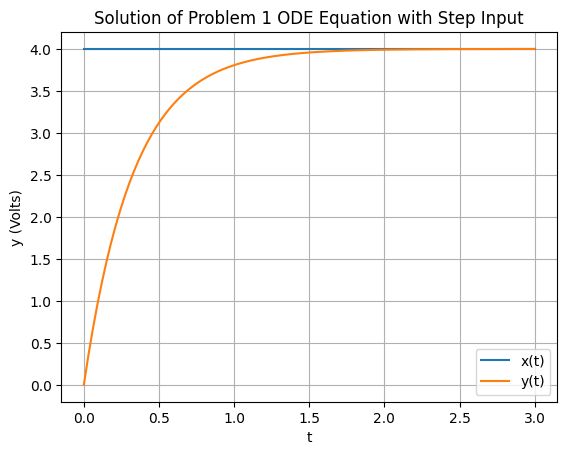

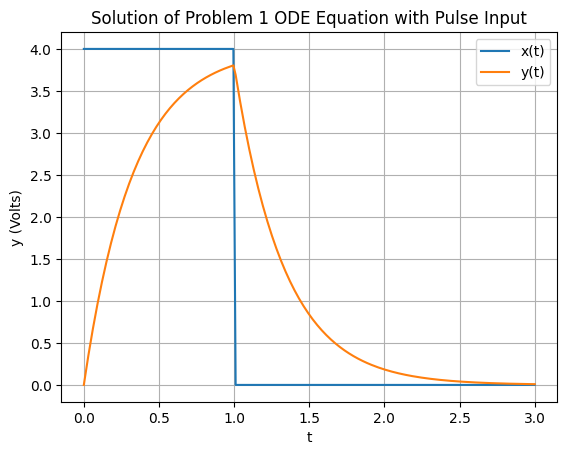

In [56]:
# Problem 2 Part B
def circuit1(y, t, A, t0, R, C): # Define the Function you are trying to Plot (args to Inport Parameters into the .odeint Function)
    u1 = np.heaviside(t - t0, 1)      # Unit Step Function using Heaviside Step Function in NumPy
    x = A * u1
    dydt = (x - y)/(R*C)
    return dydt

def circuit2(y, t, A, t0, t1, R, C): # Define the Function you are trying to Plot (args to Inport Parameters into the .odeint Function)
    u1 = np.heaviside(t - t0, 1)      # Unit Step Function using Heaviside Step Function in NumPy
    u2 = np.heaviside(t - t0 - t1, 1)      # Unit Step Function using Heaviside Step Function in NumPy
    x = A * (u1 - u2)
    dydt = (x - y)/(R*C)
    return dydt

# Parameters
R = 330         # 330 Ohms
C = 0.001       # 1000 uF = 1 mF
T = 3           # Arbitrary Value for the End Point of the Plot/Graph
A = 4           # Arbitrary Value of A (Amplitudde of Input Voltage)
t0 = 0          # Arbitrary Value of t0 (Delay of Unit Step Function)
t1 = 1          # Arbitrary Value of t1 (Length of Pulse Input)

y0 = 0          # Initial State of 0V on the Capacitor
t = np.linspace(0, T, 200)         # making the Time linear space From 0 to T in 200 steps


# Solving with scipy.integrate.odeint
input1 = A * np.heaviside(t - t0, 1)      # Step Input
solution1 = sp.integrate.odeint(circuit1, y0, t, args=(A, t0, R, C, ))

input2 = A * (np.heaviside(t - t0, 1) - np.heaviside(t - t0 - t1, 1))        # Pulse Input
solution2 = sp.integrate.odeint(circuit2, y0, t, args=(A, t0, t1, R, C, ))



# Plotting
plt.plot(t, input1, label = "x(t)")
plt.plot(t, solution1, label = "y(t)")
plt.xlabel("t")
plt.ylabel("y (Volts)")
plt.title("Solution of Problem 1 ODE Equation with Step Input")
plt.legend()
plt.grid(True)
plt.show()



plt.plot(t, input2, label = "x(t)")
plt.plot(t, solution2, label = "y(t)")
plt.xlabel("t")
plt.ylabel("y (Volts)")
plt.title("Solution of Problem 1 ODE Equation with Pulse Input")
plt.legend()
plt.grid(True)
plt.show()
